In [474]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

In [539]:
data=pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [476]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [477]:
import seaborn as sns
import matplotlib.pyplot as plt


The lifetime value of a customer, or customer lifetime value (CLV), represents the total amount of money a customer is expected to spend in business, or on products, during their lifetime. This is an important figure to know because it helps company to make decisions about how much money to invest in acquiring new customers and retaining existing ones.**

- There are 9134 Observations of 24 Variable
- There are mix of categorical and continous DataType.
- Dependent Variable is Customer Life Time Value as we have to predict the CLV.
- Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize
- Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount
- There are no null values, so no further action required to replace missing or null values.“Customer” column is serial number so it is insignificat for analysis and removed from the dataset.

### Policy Profile Variables

- Customer: Customer ID number
- Customer Lifetime Value: Customer's total worth to business over life of the relationship
- Response: Yes or No response to a renewal offer
- Coverage: Type of policy (Basic, Extended, Premium)
- Monthly Premium Auto: Amount of customers' monthly insurance payments
- Months Since Last Claim: Number of months between customers' last reported insurance claim
- Months Since Policy Inception: Number of months since customer began an insurance policy
- Number of Open Complaints: Number of unresolved customer complaints
- Number of Policies: Number of policies customer currently owns
- Policy Type: (Corporate Auto, Personal Auto, Special Auto)
- Policy: 3 levels (L1, L2, L3) per Policy Type (Corporate, Personal, Special)
- Renew Offer Type: 4 types of renewal offers (Offer 1, Offer 2, Offer 3, Offer 4)
- Sales Channel: Channels to purchase a policy (Agent, Branch, Call Center, Web)
- Total Claim Amount: Cummulative amount of claims since policy inception

### Customer Profile Variables

- State: State of residence or business
- Education: Level of education (High School or less, College, BA, MA , PHD)
- Effective To Date: Date the policy expires
- Employment Status: (Employed, Unemployed, Retired, Disabled, Medical Leave)
- Gender: Male or Female
- Income: Customers' annual income
- Location Code: (Rural, Suburban, Urban)
- Marital Status: (Single, Married, Divorced)
- Vehicle Class: Type of vehicle (4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door)
- Vehicle Size: (Large, Midsize, Small)

In [293]:
# data types
data.dtypes


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [294]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [295]:
# 9k customers
data.Customer.nunique()

9134

In [540]:
data.columns = data.columns.str.replace(' ','_')

In [297]:
data['Marital_Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64

In [298]:
State            = data['State'].value_counts()
Response         = data['Response'].value_counts()
Coverage         = data['Coverage'].value_counts()
Education        = data['Education'].value_counts()
EmploymentStatus = data['EmploymentStatus'].value_counts()
Gender           = data['Gender'].value_counts()
LocationCode     = data['Location_Code'].value_counts()
MaritalStatus    = data['Marital_Status'].value_counts()
NumberComplaints = data['Number_of_Open_Complaints'].value_counts()
NumberPolicies   = data['Number_of_Policies'].value_counts()
PolicyType       = data['Policy_Type'].value_counts()
Policy           = data['Policy'].value_counts()
RenewOfferType   = data['Renew_Offer_Type'].value_counts()
SalesChannel     = data['Sales_Channel'].value_counts()
VehicleClass     = data['Vehicle_Class'].value_counts()
VehicleSize      = data['Vehicle_Size'].value_counts()

In [299]:
label1 = {'y':'count','x':'Response'}
label2 = {'y':'count','x':'state'}
label3 = {'y':'count','x':'Coverage'}
label4 = {'y':'count','x':'Education'}
label5 = {'y':'count','x':'Employment_Status'}
label6 = {'y':'count','x':'Gender'}
label7 = {'y':'count','x':'Location_Code'}
label8 = {'y':'count','x':'Marital_Status'}
label9 = {'y':'count','x':'Number_of_Complaints'}
label10 = {'y':'count','x':'Number_of_Policies'}
label11 = {'y':'count','x':'Number_of_Policy Type'}
label12 = {'y':'count','x':'Number_of_Policy'}
label13 = {'y':'count','x':'Number_of_Renew_Offer_Type'}
label14 = {'y':'count','x':'Sales_Channel'}
label15 = {'y':'count','x':'Vehicle_Class'}
label16 = {'y':'count','x':'Vehicle_Size'}
labels = [label1 , label2 , label3, label4, label5, label6,label7,label8,label9,label10,label11,label12,label13,label14,label15,label16]
index = [Response.index , State.index , Coverage.index, Education.index , EmploymentStatus.index, Gender.index, LocationCode.index, MaritalStatus.index, NumberComplaints.index,NumberPolicies.index, PolicyType.index,Policy.index,RenewOfferType.index,SalesChannel.index,VehicleClass.index,VehicleSize.index]
values= [Response.values , State.values, Coverage.values, Education.values,EmploymentStatus.values ,Gender.values, LocationCode.values, MaritalStatus.values, NumberComplaints.values, NumberPolicies.values, PolicyType.values,Policy.values,RenewOfferType.values,SalesChannel.values,VehicleClass.values,VehicleSize.values]
title = ['Response of our customer', 'state of our customers', 'Coverage', 'Education level', 'Employment Status','Gender','Location Code', 'Marital Status', 'Number of Complaints','Number of Policies','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size']

In [302]:
# Checking null values in each column and storing the value in a data frame na_counts
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(24)

,Total,%
Customer,0,0.0
State,0,0.0
Vehicle_Class,0,0.0
Total_Claim_Amount,0,0.0
Sales_Channel,0,0.0
Renew_Offer_Type,0,0.0
Policy,0,0.0
Policy_Type,0,0.0
Number_of_Policies,0,0.0
Number_of_Open_Complaints,0,0.0


In [541]:
df=data.copy()

In [542]:
df=df[(df['Customer_Lifetime_Value']<=60000)]
df.shape

(9125, 24)

In [543]:
df['segment'] = df['Customer_Lifetime_Value'].apply(
lambda x: 'High' if x > df['Customer_Lifetime_Value'].median() else 'Low'
)

In [578]:
df['Customer_Lifetime_Value'].min()
df['Customer_Lifetime_Value'].max()

1898.007675

58753.88046

In [544]:
df['segment'].value_counts()

Low     4568
High    4557
Name: segment, dtype: int64

In [309]:
df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'segment'],
      dtype='object')

In [337]:
df.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
segment         

In [545]:
categorical_df = df.select_dtypes(include='object')
categorical_df.shape
categorical_df.columns


(9125, 17)

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'segment'],
      dtype='object')

In [546]:
cat_df = categorical_df.drop(['Customer','Effective_To_Date','segment'], axis = 1)

In [547]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = lb.fit_transform(cat_df[col])
cat_df.shape

(9125, 14)

In [548]:
cat_df=pd.concat([cat_df,categorical_df['segment']],axis=1 )
cat_df.shape
cat_df.columns
cat_df.dtypes

(9125, 15)

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size',
       'segment'],
      dtype='object')

State                int64
Response             int64
Coverage             int64
Education            int64
EmploymentStatus     int64
Gender               int64
Location_Code        int64
Marital_Status       int64
Policy_Type          int64
Policy               int64
Renew_Offer_Type     int64
Sales_Channel        int64
Vehicle_Class        int64
Vehicle_Size         int64
segment             object
dtype: object

In [549]:
cat_df.isna().sum()

State               0
Response            0
Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location_Code       0
Marital_Status      0
Policy_Type         0
Policy              0
Renew_Offer_Type    0
Sales_Channel       0
Vehicle_Class       0
Vehicle_Size        0
segment             0
dtype: int64

In [550]:
import statsmodels.api as sm
from sklearn import preprocessing

continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.reset_index(drop = True, inplace=True)
def stand_sca(data):
    new_data=(data-data.mean())/data.std()
    return new_data
continous_var_df=stand_sca(continous_var_df)
continous_var_df.shape

(9125, 8)

In [551]:
continous_var_df.head()
continous_var_df.isna().sum()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,-0.784444,0.612363,-0.704415,1.679035,-1.543039,-0.422244,-0.822662,-0.167761
1,-0.146248,-1.240080,0.026254,-0.207824,-0.217470,-0.422244,2.104778,2.415628
2,0.748054,0.365246,0.435429,0.288718,-0.360775,-0.422244,-0.404456,0.460778
3,-0.045383,-1.240080,0.376976,0.288718,0.606533,-0.422244,1.686572,0.334176
4,-0.776849,0.202926,-0.587508,-0.307132,-0.145818,-0.422244,-0.822662,-1.021264


Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
dtype: int64

In [560]:
preprocessing.scale(continous_var_df,axis=0, with_mean=True, with_std=True, copy=True)
cat_df.reset_index(drop = True, inplace=True)
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)
all_data_df.isna().sum()
all_data_df.shape

array([[-0.78448649,  0.61239668, -0.70445369, ..., -0.42226709,
        -0.8227073 , -0.16777006],
       [-0.14625591, -1.24014814,  0.0262559 , ..., -0.42226709,
         2.1048932 ,  2.41576012],
       [ 0.74809533,  0.3652656 ,  0.43545326, ..., -0.42226709,
        -0.40447866,  0.46080364],
       ...,
       [ 0.03303448, -1.24014814, -0.23679955, ...,  2.87199385,
        -0.40447866,  1.23695818],
       [-0.06376667, -0.51784858,  0.08471266, ..., -0.42226709,
         0.01374998,  0.89237972],
       [-0.80744853, -1.24014814, -0.47062662, ..., -0.42226709,
        -0.8227073 , -0.22040283]])

Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location_Code                    0
Marital_Status                   0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Vehicle_Class                    0
Vehicle_Size                     0
segment                          0
dtype: int64

(9125, 23)

In [561]:
all_data_df=all_data_df[['Monthly_Premium_Auto','Number_of_Open_Complaints','Total_Claim_Amount','Coverage',
            'Marital_Status', 'Number_of_Policies','segment']]

In [562]:
all_data_df.columns
all_data_df.shape

Index(['Monthly_Premium_Auto', 'Number_of_Open_Complaints',
       'Total_Claim_Amount', 'Coverage', 'Marital_Status',
       'Number_of_Policies', 'segment'],
      dtype='object')

(9125, 7)

In [499]:
all_data_df.dtypes

Income                           float64
Monthly_Premium_Auto             float64
Months_Since_Last_Claim          float64
Months_Since_Policy_Inception    float64
Number_of_Open_Complaints        float64
Number_of_Policies               float64
Total_Claim_Amount               float64
State                              int64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Location_Code                      int64
Marital_Status                     int64
Policy_Type                        int64
Policy                             int64
Renew_Offer_Type                   int64
Sales_Channel                      int64
Vehicle_Class                      int64
Vehicle_Size                       int64
segment                           object
dtype: object

In [ ]:
all_data_df.dtypes

In [563]:
final_df=all_data_df.copy()

In [564]:
final_df.head(2)

,Monthly_Premium_Auto,Number_of_Open_Complaints,Total_Claim_Amount,Coverage,Marital_Status,Number_of_Policies,segment
0,-0.704415,-0.422244,-0.167761,0,1,-0.822662,Low
1,0.026254,-0.422244,2.415628,1,2,2.104778,High


In [565]:
final_df.columns

Index(['Monthly_Premium_Auto', 'Number_of_Open_Complaints',
       'Total_Claim_Amount', 'Coverage', 'Marital_Status',
       'Number_of_Policies', 'segment'],
      dtype='object')

In [566]:
final_df.isna().sum()
#final_df.fillna(0)

Monthly_Premium_Auto         0
Number_of_Open_Complaints    0
Total_Claim_Amount           0
Coverage                     0
Marital_Status               0
Number_of_Policies           0
segment                      0
dtype: int64

In [581]:
from sklearn.model_selection import cross_val_score,train_test_split
X=final_df.drop('segment',axis=1)
y=final_df['segment']
col_names=X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.shape, y_train.shape, y_test.shape

((2738, 6), (6387,), (2738,))

In [504]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [582]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
classifier = SVC()
classifier = classifier.fit(X_train,y_train)

#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
 

Accuracy Score: 0.9320672023374726


In [580]:
df['segment'].value_counts()/len(df)

Low     0.500603
High    0.499397
Name: segment, dtype: float64

In [569]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.91      0.96      0.93      1362
         Low       0.95      0.91      0.93      1376

    accuracy                           0.93      2738
   macro avg       0.93      0.93      0.93      2738
weighted avg       0.93      0.93      0.93      2738



In [570]:
from sklearn.model_selection import cross_val_score,train_test_split
X=final_df.drop('segment',axis=1)
y=final_df['segment']

In [571]:
y = lb.fit_transform(y)


In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((6387, 6), (2738, 6), (6387,), (2738,))

In [573]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#rfc = RandomForestClassifier()
abc =AdaBoostClassifier(n_estimators=20, base_estimator=svc,learning_rate=1, random_state=0)
# fit the predictor and target
#rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
# predict
#rfc_predict = rfc.predict(X_test)# check performance
abc_predict = abc.predict(X_test)
#print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, abc_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test,abc_predict))

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1, n_estimators=20, random_state=0)

Accuracy score: 0.639517896274653
              precision    recall  f1-score   support

           0       0.71      0.46      0.56      1362
           1       0.60      0.81      0.69      1376

    accuracy                           0.64      2738
   macro avg       0.66      0.64      0.63      2738
weighted avg       0.66      0.64      0.63      2738



In [529]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')

In [507]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [425]:
df.Response.value_counts()

No     7817
Yes    1308
Name: Response, dtype: int64

# EDA 

In [362]:
df.shape

(9125, 25)

In [372]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [373]:

#df1.dataframeName = 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9125 rows and 25 columns


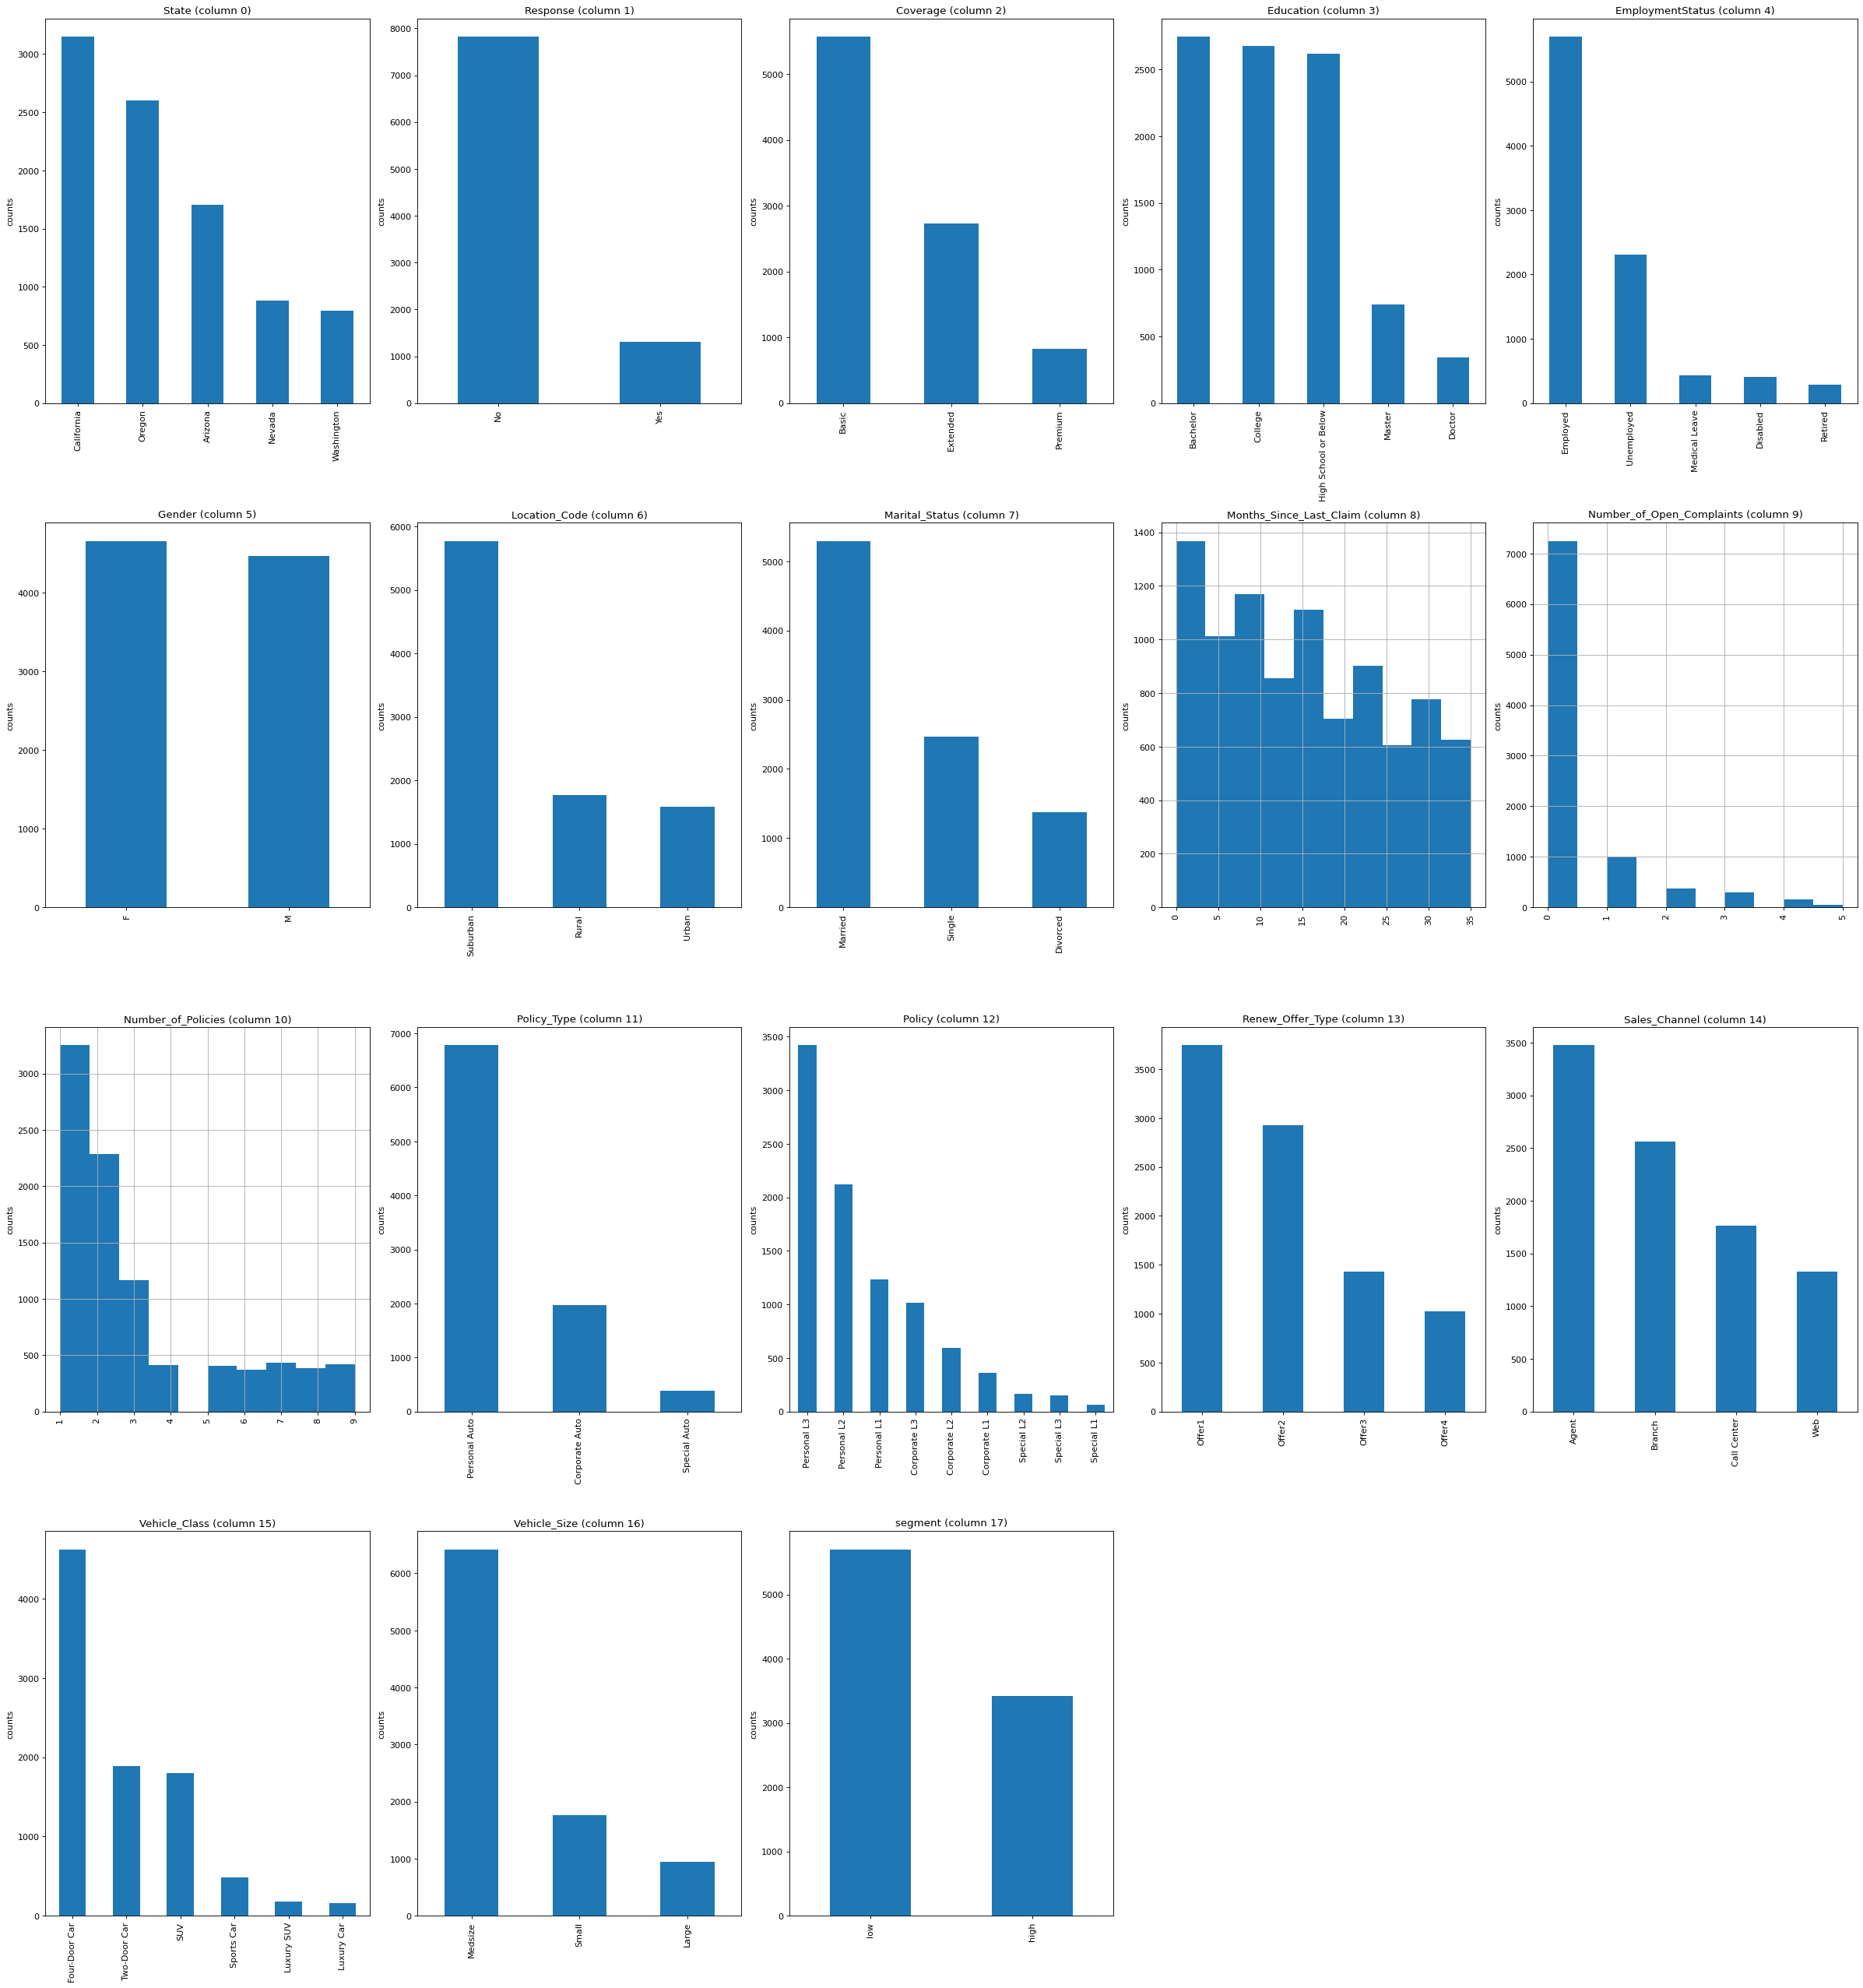

In [375]:
plotPerColumnDistribution(df, 20, 5)

In [439]:
final_df.columns

Index(['Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Total_Claim_Amount', 'State', 'Response',
       'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'segment'],
      dtype='object')

Female customers have higher CLV than male customers assuming all other things equal.
Divorced and married customers have higher CLV than single customers.
Customers with average income (i.e., 30K - 50K) have higher CLV than customers in other income groups.
Being employeed is associated with an uplift of 448 comapred to the umemployeed group.
If the insured vehicles are luxury cars, SUV or sports cars, then the customer contributes to a higher CLV.
Customers with small and medium-size cars also tend to have higher CLV.
Overall, marital status, income and employment status have the strongest explaining power, and we should pay more attention to these factors when examining results from Kmeans clustering.

In [433]:
df.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.029039,0.383360,0.008076,0.011515,-0.036157,0.026478,0.212368
Income,0.029039,1.000000,-0.014974,-0.027188,-0.000868,0.006205,-0.008849,-0.354852
Monthly_Premium_Auto,0.383360,-0.014974,1.000000,0.003787,0.021064,-0.012535,-0.009913,0.629635
Months_Since_Last_Claim,0.008076,-0.027188,0.003787,1.000000,-0.042869,0.005326,0.009317,0.008257
Months_Since_Policy_Inception,0.011515,-0.000868,0.021064,-0.042869,1.000000,-0.001078,-0.013418,0.003126
Number_of_Open_Complaints,-0.036157,0.006205,-0.012535,0.005326,-0.001078,1.000000,0.001428,-0.013519
Number_of_Policies,0.026478,-0.008849,-0.009913,0.009317,-0.013418,0.001428,1.000000,-0.001260
Total_Claim_Amount,0.212368,-0.354852,0.629635,0.008257,0.003126,-0.013519,-0.001260,1.000000


<AxesSubplot:>

,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,State,Response,Coverage,...,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
Income,1.000000,-0.014974,-0.027188,-0.000868,0.006205,-0.008849,-0.354852,0.004468,0.011750,-0.010744,...,-0.726489,-0.015210,-0.027278,-0.231512,0.001966,0.004974,0.139948,0.013767,0.004069,0.007734
Monthly_Premium_Auto,-0.014974,1.000000,0.003787,0.021064,-0.012535,-0.009913,0.629635,0.006491,0.012440,0.459837,...,0.003903,0.002771,0.003052,0.011399,-0.001584,-0.001647,-0.068687,-0.011980,0.171084,0.007494
Months_Since_Last_Claim,-0.027188,0.003787,1.000000,-0.042869,0.005326,0.009317,0.008257,0.001918,-0.016438,0.016294,...,0.008580,0.025551,-0.016425,0.008091,-0.017778,-0.013482,-0.015893,0.004234,-0.001995,-0.004593
Months_Since_Policy_Inception,-0.000868,0.021064,-0.042869,1.000000,-0.001078,-0.013418,0.003126,0.014143,0.002871,0.011153,...,0.015422,0.004017,0.006845,-0.029466,-0.003790,-0.006168,-0.092148,-0.004999,0.003076,0.004741
Number_of_Open_Complaints,0.006205,-0.012535,0.005326,-0.001078,1.000000,0.001428,-0.013519,0.000086,-0.009955,-0.008091,...,0.007191,-0.003112,-0.002569,0.000174,0.014419,0.019049,-0.034123,-0.007349,-0.016467,-0.005639
Number_of_Policies,-0.008849,-0.009913,0.009317,-0.013418,0.001428,1.000000,-0.001260,-0.013728,-0.021058,-0.013276,...,0.005289,0.016408,0.003007,0.011802,-0.006570,-0.007896,-0.081366,0.013661,-0.005509,0.018244
Total_Claim_Amount,-0.354852,0.629635,0.008257,0.003126,-0.013519,-0.001260,1.000000,0.004789,0.018093,0.280299,...,0.329590,0.073583,0.255962,0.204078,0.008307,0.000936,-0.085668,-0.010308,0.099266,0.073823
State,0.004468,0.006491,0.001918,0.014143,0.000086,-0.013728,0.004789,1.000000,-0.002324,0.001791,...,0.000539,-0.005522,-0.005080,0.019955,0.008378,0.014366,-0.006997,-0.002591,0.011377,0.006558
Response,0.011750,0.012440,-0.016438,0.002871,-0.009955,-0.021058,0.018093,-0.002324,1.000000,0.000893,...,-0.016466,0.004541,0.001670,-0.094747,0.001163,-0.001411,-0.163217,-0.086640,0.021207,-0.050707
Coverage,-0.010744,0.459837,0.016294,0.011153,-0.008091,-0.013276,0.280299,0.001791,0.000893,1.000000,...,0.003025,-0.014569,-0.019792,0.003191,0.001077,-0.002397,-0.048641,-0.024683,-0.017884,-0.003838


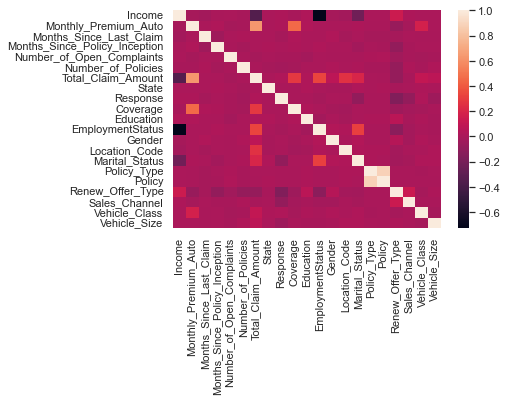

In [436]:

#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = final_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
final_df.corr()

<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Pearson Correlation')

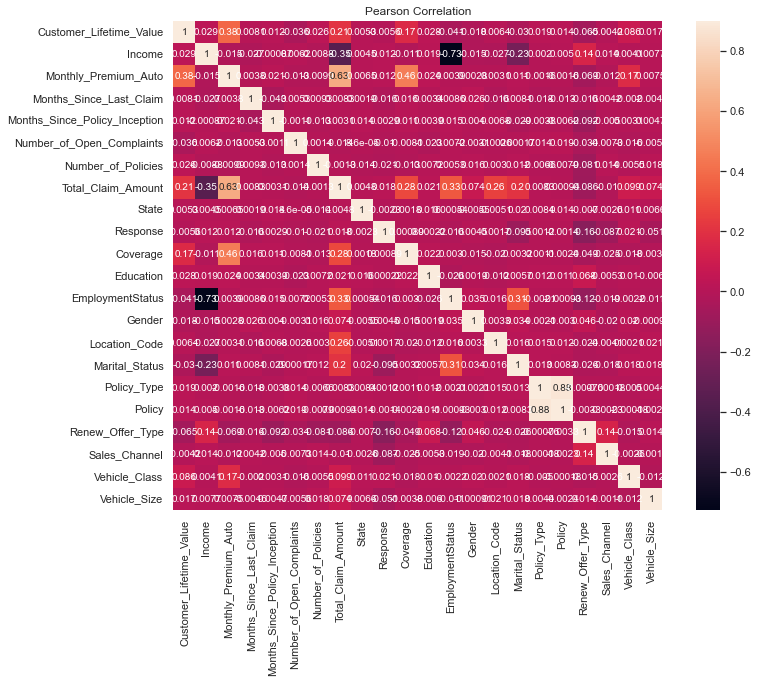

In [452]:
#heatmap correlation
plt.figure(figsize = (12,9))
sns.heatmap(all_data_df.corr(), vmax = 0.9,annot=True, square = True)
plt.title("Pearson Correlation")
plt.show()

In [376]:
def pie_chart(data: pd.DataFrame, title: str, fontsz: str = 14, figsize:tuple =(8,8), boxtitle = None):
    """Simple pie chart
    
    Args:
        data: data information for graph
        title: Title of graph
        fontsz: fontsize in chart
        boxtitle: title for categories
        
    Returns:
        Show a graph (notebook)
    """
    if not boxtitle:
        boxtitle = data.index.name
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return "{:.1f}%\n{:d}".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data.iloc[0:,0], autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))
    ax.legend(wedges, data.index,
              title=boxtitle,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=fontsz)# , weight="bold")
    ax.set_title(title)
    plt.show()


def bar_by_values(data: pd.DataFrame, show_by: str, cols: list):
    """Show data grouping by offer.
    
    Args:
        data: pd.DataFrame
        show_by: name of col to split
        cols: cols to grouping
    """
    dataframes = []
    values = list(data.loc[:, show_by].unique())
    for value in values:
        cond_value = data.loc[:, show_by] == value
        dataframes.append(data.loc[cond_value])
    a = int(np.sqrt(len(values)))
    b = int(len(values) / a)
    a, b = max(a, b), min(a, b)
    fig, axes = plt.subplots(a,b , figsize=(12, 12))

    for dataframe, ax, value in zip(dataframes, fig.axes, values):
        data.groupby(cols).count()['Customer'].unstack().plot(kind='bar', ax=ax, ylabel='Customers');
        ax.set_title(f'{value}')
    fig.tight_layout()

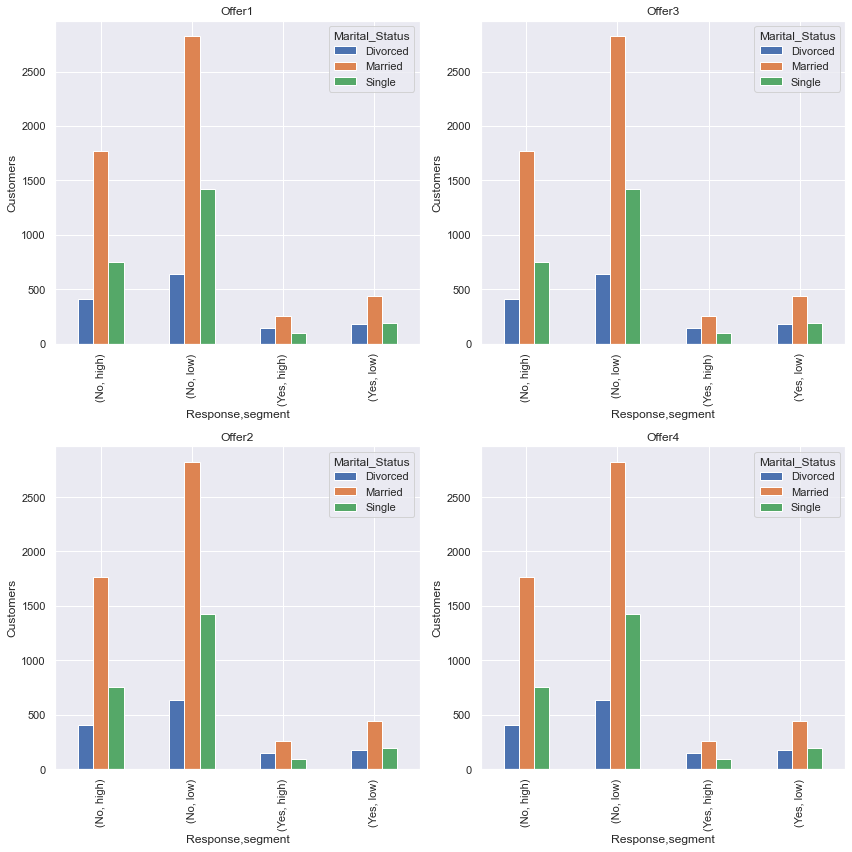

In [392]:
bar_by_values(df, 'Renew_Offer_Type', ['Response', 'segment', 'Marital_Status'])

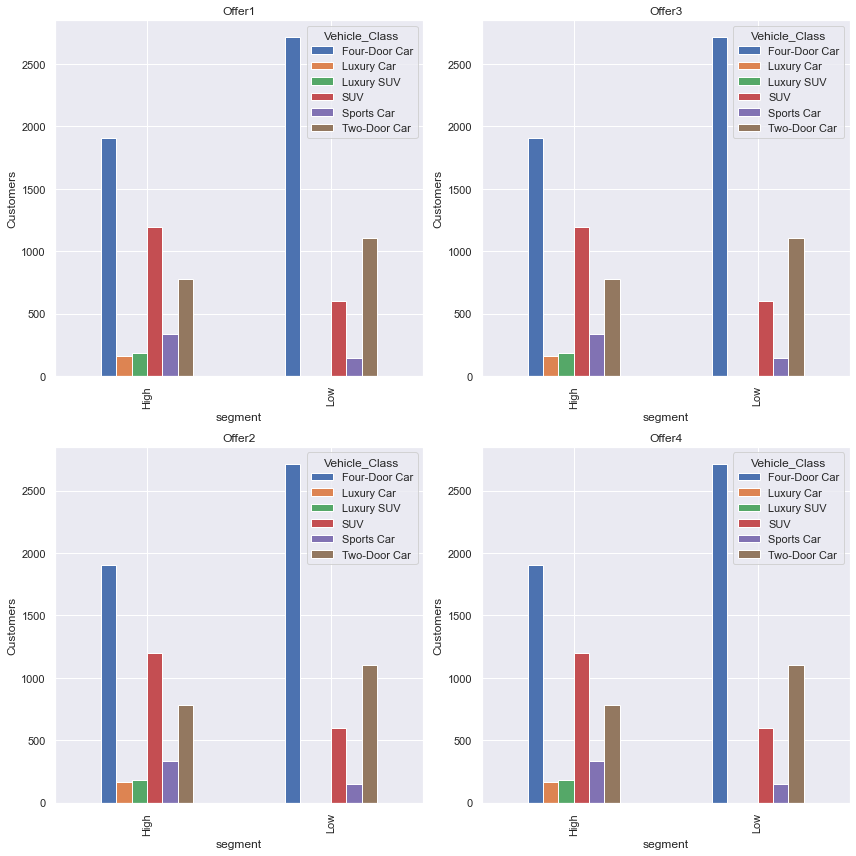

In [533]:
bar_by_values(df, 'Renew_Offer_Type', ['segment', 'Vehicle_Class'])

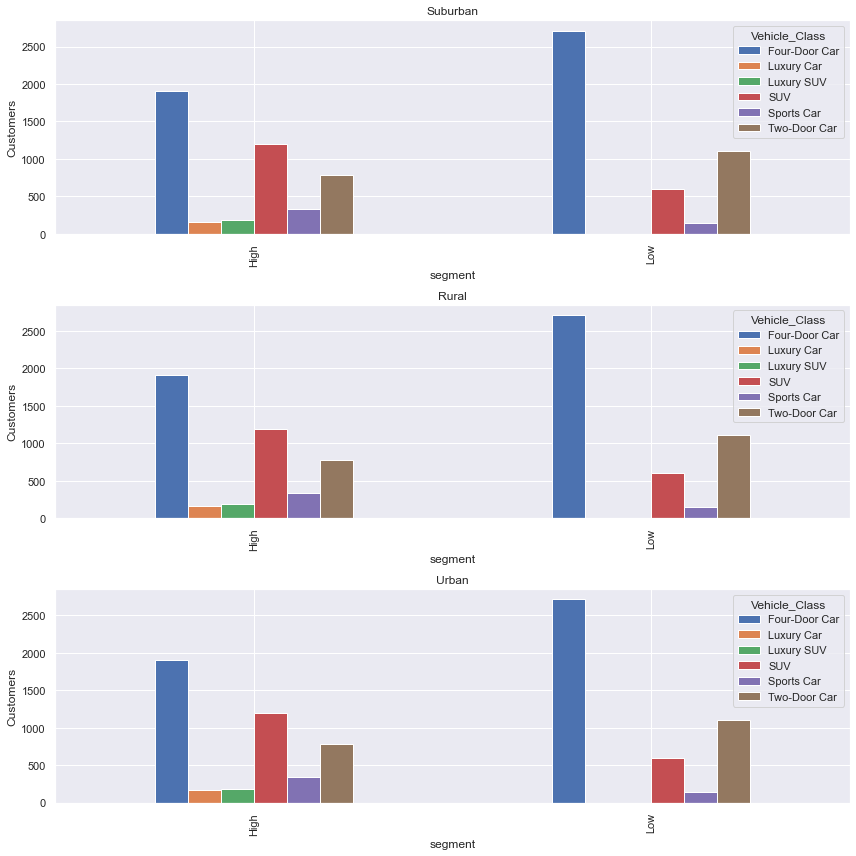

In [534]:
bar_by_values(df, 'Location_Code', ['segment', 'Vehicle_Class'])

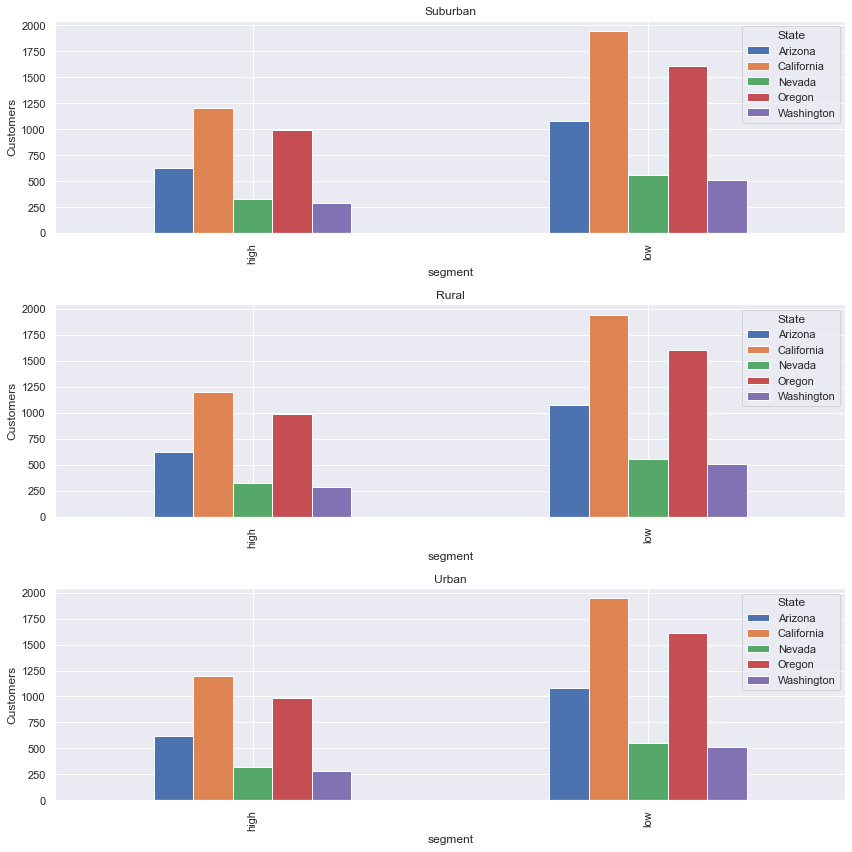

In [397]:
bar_by_values(df, 'Location_Code', ['segment', 'State'])

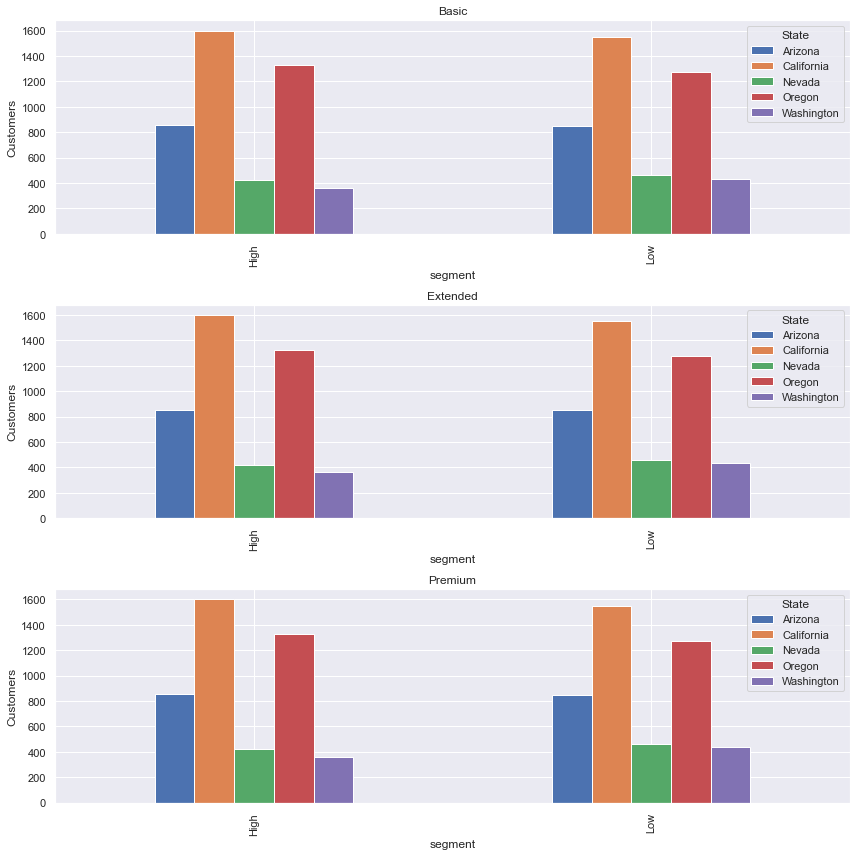

In [537]:
bar_by_values(df, 'Coverage', ['segment', 'State'])

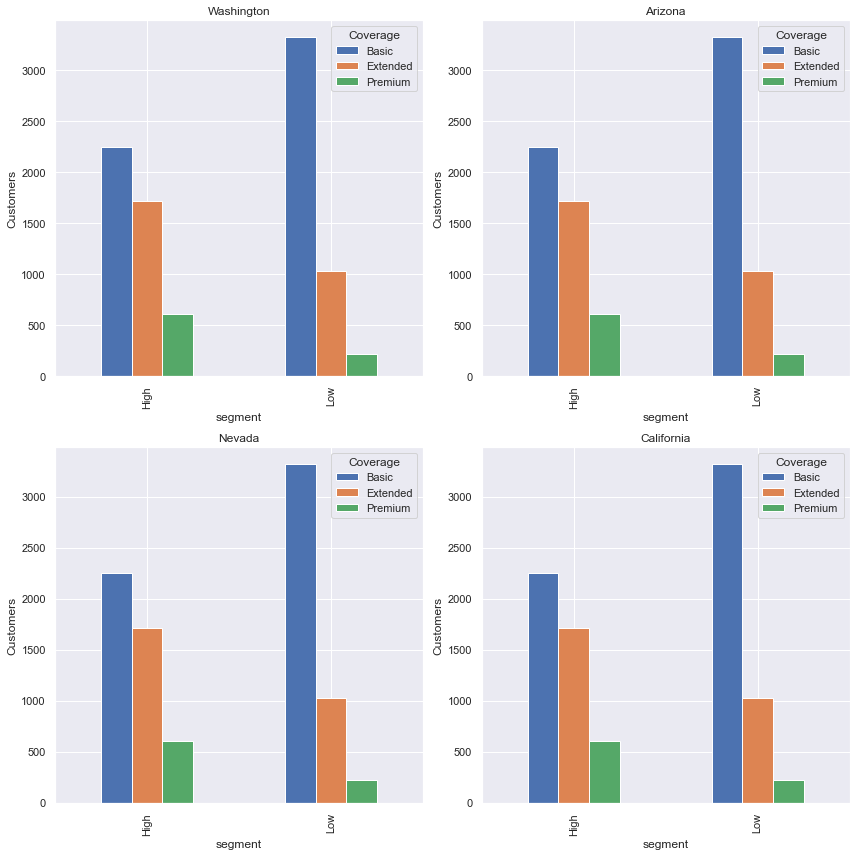

In [538]:
bar_by_values(df, 'State', ['segment', 'Coverage'])

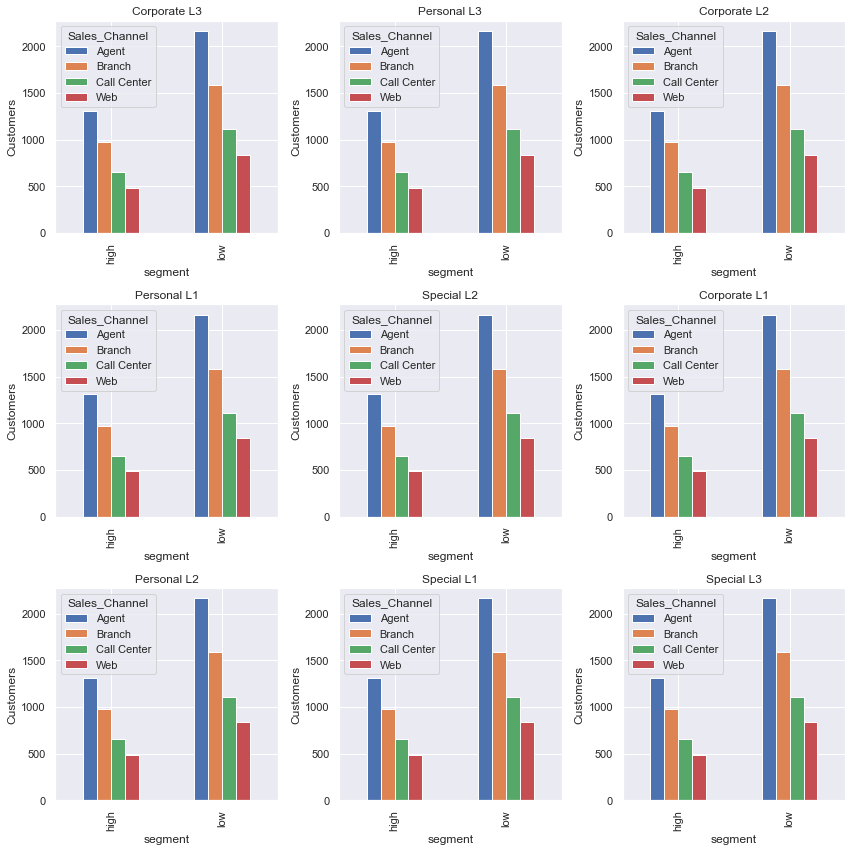

In [405]:
bar_by_values(df, 'Policy', ['segment', 'Sales_Channel'])

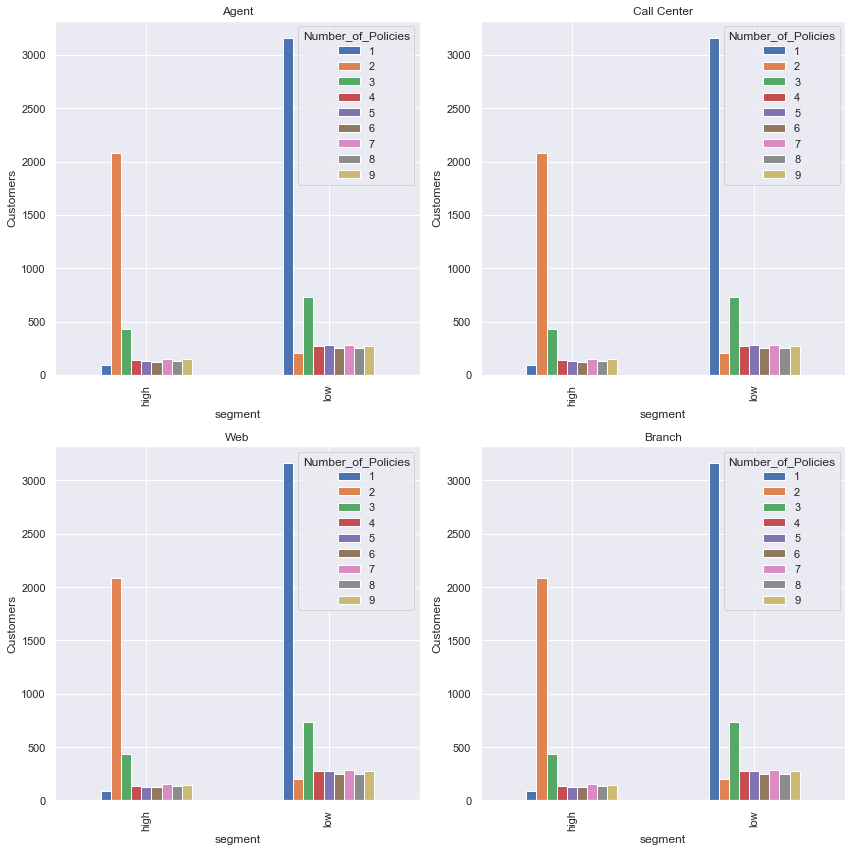

In [412]:
bar_by_values(df,'Sales_Channel', ['segment','Number_of_Policies'])

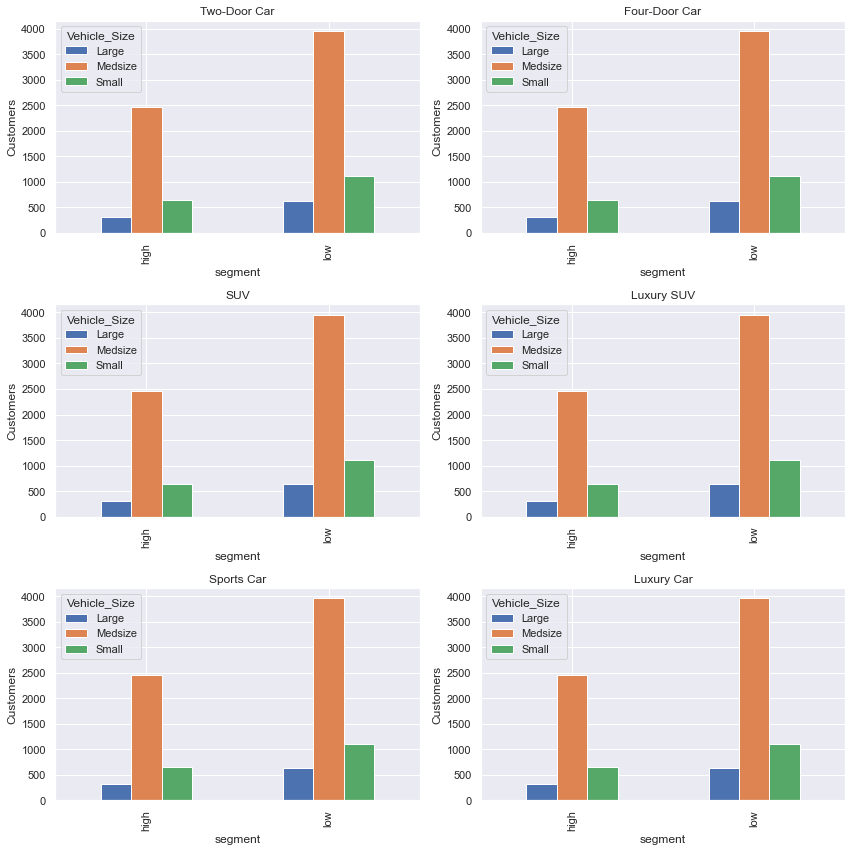

In [416]:
bar_by_values(df,'Vehicle_Class', ['segment','Vehicle_Size'])

In [421]:
df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'segment'],
      dtype='object')

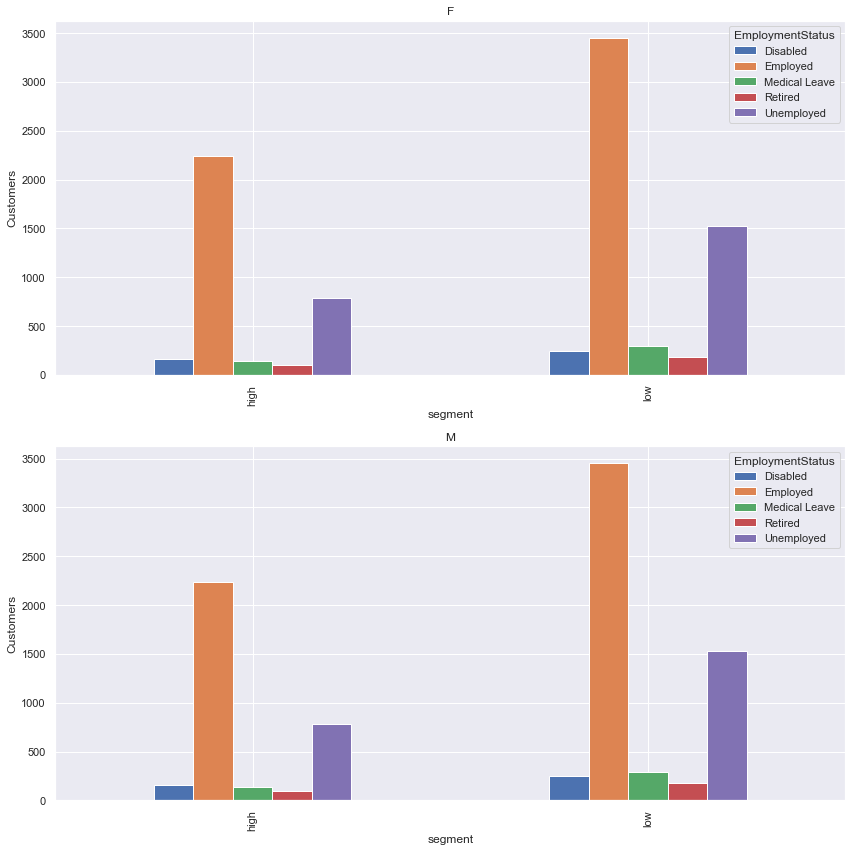

In [422]:
bar_by_values(df,'Gender', ['segment','EmploymentStatus'])

In [ ]:
### Policy Profile Variables

- Customer: Customer ID number
- Customer Lifetime Value: Customer's total worth to business over life of the relationship
- Response: Yes or No response to a renewal offer
- Coverage: Type of policy (Basic, Extended, Premium)
- Monthly Premium Auto: Amount of customers' monthly insurance payments
- Months Since Last Claim: Number of months between customers' last reported insurance claim
- Months Since Policy Inception: Number of months since customer began an insurance policy
- Number of Open Complaints: Number of unresolved customer complaints
- Number of Policies: Number of policies customer currently owns
- Policy Type: (Corporate Auto, Personal Auto, Special Auto)
- Policy: 3 levels (L1, L2, L3) per Policy Type (Corporate, Personal, Special)
- Renew Offer Type: 4 types of renewal offers (Offer 1, Offer 2, Offer 3, Offer 4)
- Sales Channel: Channels to purchase a policy (Agent, Branch, Call Center, Web)
- Total Claim Amount: Cummulative amount of claims since policy inception

### Customer Profile Variables

- State: State of residence or business
- Education: Level of education (High School or less, College, BA, MA , PHD)
- Effective To Date: Date the policy expires
- Employment Status: (Employed, Unemployed, Retired, Disabled, Medical Leave)
- Gender: Male or Female
- Income: Customers' annual income
- Location Code: (Rural, Suburban, Urban)
- Marital Status: (Single, Married, Divorced)
- Vehicle Class: Type of vehicle (4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door)
- Vehicle Size: (Large, Midsize, Small)

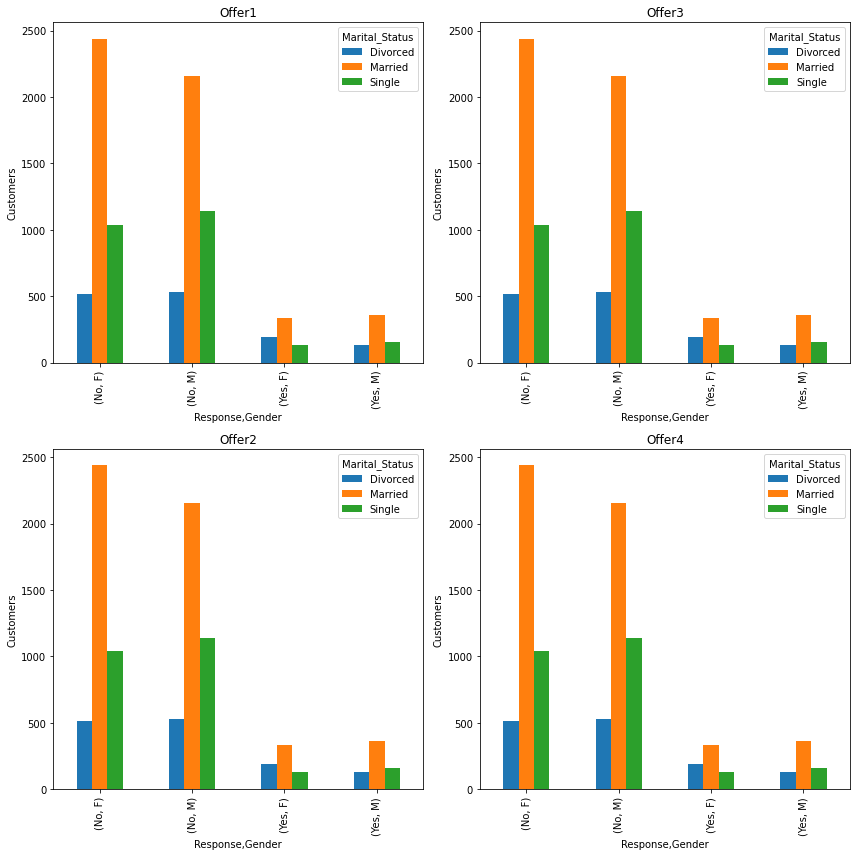

In [377]:
bar_by_values(df, 'Renew_Offer_Type', ['Response', 'Gender', 'Marital_Status'])

In [380]:
import itertools

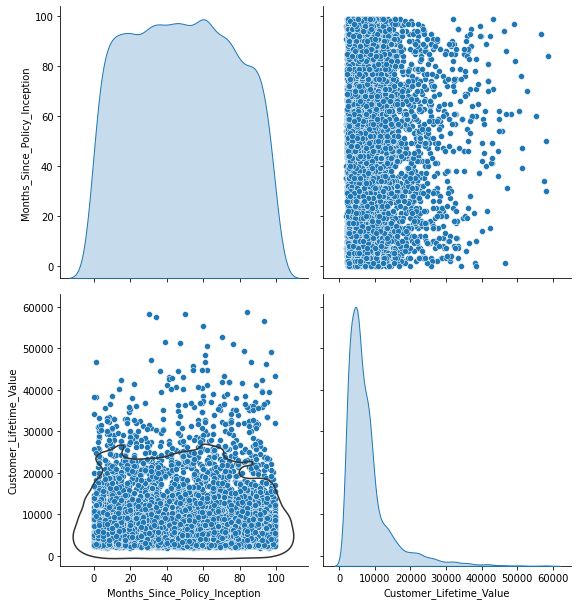

In [388]:
graph = sns.pairplot(df[['Months_Since_Policy_Inception', 'Customer_Lifetime_Value']], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=2, color=".2")

graph.fig.set_figwidth(9)
graph.fig.set_figheight(9)

<Figure size 1080x1440 with 0 Axes>

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x2a8e877f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a8e87d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a8e87520>],
 'medians': [<matplotlib.lines.Line2D at 0x2a8eac370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a8eac640>],
 'means': []}

Text(0.5, 1.0, 'Income')

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x2a8ed63e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a8ed6980>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a8ed6110>],
 'medians': [<matplotlib.lines.Line2D at 0x2a8ed6f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a8ed71f0>],
 'means': []}

Text(0.5, 1.0, 'Monthly_Premium_Auto')

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x2a8f31090>,
 'caps': [<matplotlib.lines.Line2D at 0x2a8f31630>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a8f30dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a8f31bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a8f31ea0>],
 'means': []}

Text(0.5, 1.0, 'Total_Claim_Amount')

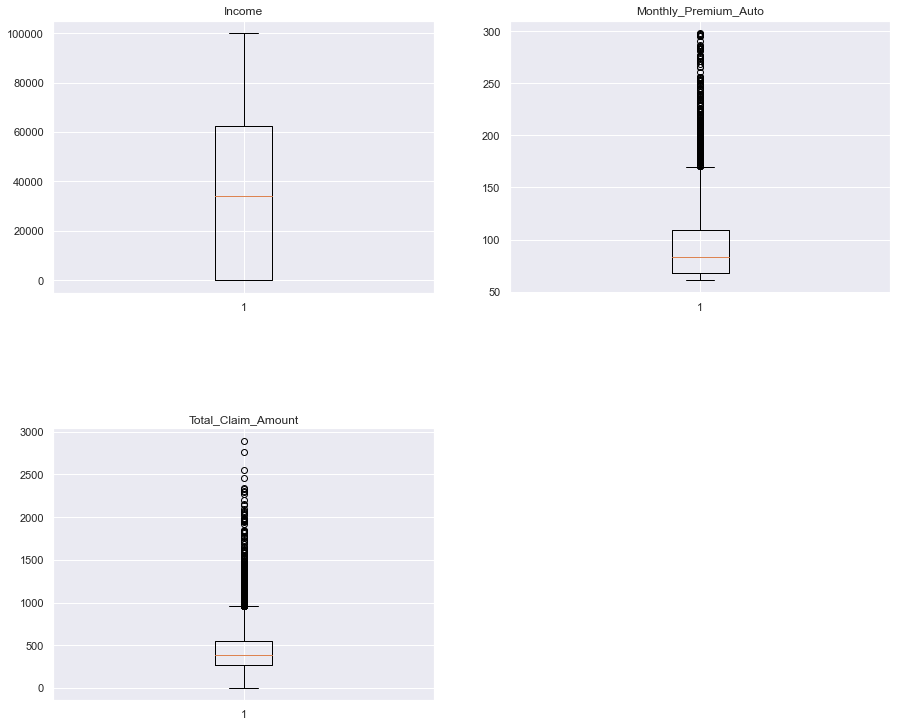

In [389]:
# Looking at outliers of continuos variables

significant_cont = ['Income','Monthly_Premium_Auto','Total_Claim_Amount']

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cont)):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[significant_cont[i]])
    plt.title(significant_cont[i])
    
plt.show()

# REGRESSION

In [453]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Stats from Regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Function to calculate Mean 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [454]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

In [455]:
data_clv = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv', index_col=0).dropna()
data_clv[:10]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize


In [456]:
matrix = data_clv.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                   

In [457]:
data_clv.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [458]:
data_clv.columns = [c.replace(' ', '_') for c in data_clv.columns]
data_clv

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [459]:
data_clv.drop(['State','Response','EmploymentStatus',\
           'Gender','Location_Code','Vehicle_Size','Policy',\
           'Policy_Type','Sales_Channel','Income','Effective_To_Date',\
           'Education'],axis=1,inplace = True)

In [460]:
data_clv['Number_of_Policies'] = np.where(data_clv['Number_of_Policies']>2,3,data_clv['Number_of_Policies'])

In [461]:
new = pd.get_dummies(data_clv,columns=['Coverage','Marital_Status','Number_of_Policies',\
                                       'Renew_Offer_Type','Vehicle_Class'],drop_first=True)

In [462]:
new.head()

,Customer_Lifetime_Value,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Total_Claim_Amount,Coverage_Extended,Coverage_Premium,Marital_Status_Married,Marital_Status_Single,Number_of_Policies_2,Number_of_Policies_3,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
Customer,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,69,32,5,0,384.811147,0,0,1,0,0,0,0,0,0,0,0,0,0,1
QZ44356,6979.535903,94,13,42,0,1131.464935,1,0,0,1,0,1,0,1,0,0,0,0,0,0
AI49188,12887.431650,108,18,38,0,566.472247,0,1,1,0,1,0,0,0,0,0,0,0,0,1
WW63253,7645.861827,106,18,65,0,529.881344,0,0,1,0,0,1,0,0,0,0,0,1,0,0
HB64268,2813.692575,73,12,44,0,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [463]:
# Splitting in Test - Train

X = new.drop('Customer_Lifetime_Value',axis=1)
y = new['Customer_Lifetime_Value']

# Dropping the variables which have low significance for the model
# X = data_clv.drop(['State','Response','EmploymentStatus','Gender','Location_Code','Vehicle_Size','Policy','Policy_Type', 'Sales_Channel', 'Income' ,'Effective_To_Date','Education'],axis=1)

# Fiting a linear model on the full dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.model_selection import train_test_split

# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

LinearRegression()

(6393, 19)
(2741, 19)
(2741,)
(6393,)


In [464]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')


Coefficients: [ 7.88561276e+01  6.54663679e+00  3.43541254e+00 -1.78016409e+02
 -3.47824889e-01  5.24947210e+01 -3.52429899e+02  7.26996378e+01
 -3.57995417e+02  1.20035189e+04  3.65284494e+03  2.81770834e+02
  2.12709235e+02  5.86308055e+01  4.88737654e+02  2.49398994e+02
  2.91635421e+02  6.08325318e+02  3.81994562e+01]
Intercept: -4078.922291142854
R^2 score: 0.6337510491201118
R^2 score for train: 0.6375657566515562
R^2 score for test: 0.6259891695519406


In [465]:
lin_reg.score(X_test,y_test)

0.6259891695519406

Feature: 0, Score: 78.85613
Feature: 1, Score: 6.54664
Feature: 2, Score: 3.43541
Feature: 3, Score: -178.01641
Feature: 4, Score: -0.34782
Feature: 5, Score: 52.49472
Feature: 6, Score: -352.42990
Feature: 7, Score: 72.69964
Feature: 8, Score: -357.99542
Feature: 9, Score: 12003.51891
Feature: 10, Score: 3652.84494
Feature: 11, Score: 281.77083
Feature: 12, Score: 212.70923
Feature: 13, Score: 58.63081
Feature: 14, Score: 488.73765
Feature: 15, Score: 249.39899
Feature: 16, Score: 291.63542
Feature: 17, Score: 608.32532
Feature: 18, Score: 38.19946


<BarContainer object of 19 artists>

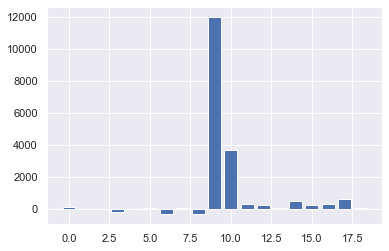

In [466]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [467]:
from sklearn.ensemble import GradientBoostingRegressor 

In [468]:
metrics = [r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error]

In [469]:
r2 = []
mae = []
mape = []
mse = []

In [470]:
gbr = GradientBoostingRegressor ()
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_gbr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_gbr))
    else:
        mse.append(i(y_test,y_pred_gbr))

GradientBoostingRegressor()

0.6781227446913687
1753.8915563501487
13.594909266328317
16750271.386674926
